In [1]:
#GitHub Link:https://github.com/arpit-shrivastava-2020/Deep-Learning-1st-Lab-Assignment.git

In [2]:
print("Code by Arpit Shrivastava, Registration No.:(20MAI0068)")

Code by Arpit Shrivastava, Registration No.:(20MAI0068)


In [3]:
!pip install PyDrive

In [4]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
download = drive.CreateFile({'id': '1G8pr8anEC8uitSGrtdEZZ9FaZGeY1PQp'})

In [7]:
download.GetContentFile('Train.zip')
!unzip Train.zip

Archive:  Train.zip
replace Train/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Train/train.csv         
 extracting: Train/train/1.png       
 extracting: Train/train/10.png      
 extracting: Train/train/100.png     
 extracting: Train/train/11.png      
 extracting: Train/train/12.png      
 extracting: Train/train/13.png      
 extracting: Train/train/14.png      
 extracting: Train/train/15.png      
 extracting: Train/train/16.png      
 extracting: Train/train/17.png      
 extracting: Train/train/18.png      
 extracting: Train/train/19.png      
 extracting: Train/train/2.png       
 extracting: Train/train/20.png      
 extracting: Train/train/21.png      
 extracting: Train/train/22.png      
 extracting: Train/train/23.png      
  inflating: Train/train/24.png      
 extracting: Train/train/25.png      
 extracting: Train/train/26.png      
 extracting: Train/train/27.png      
 extracting: Train/train/28.png      
 extracting: Train/train/29.png      
 ex

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [9]:
train = pd.read_csv('Train/train.csv')

In [10]:
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [11]:
train.tail()

,id,label
95,96,4
96,97,7
97,98,2
98,99,8
99,100,8


In [12]:
train_img = []
for img_name in tqdm(train['id']):
    image_path = 'Train/train/' + str(img_name) + '.png'
    img = imread(image_path, as_gray=True)
    img /= 255.0
    img = img.astype('float32')
    train_img.append(img)
train_x = np.array(train_img)
train_y = train['label'].values
train_x.shape

100%|██████████| 100/100 [00:00<00:00, 1624.02it/s]


(100, 28, 28)

In [13]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Train/train/'+train['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 100/100 [00:00<00:00, 2169.03it/s]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fcd6f506c50>,
 <matplotlib.image.AxesImage at 0x7fcd6f496590>)

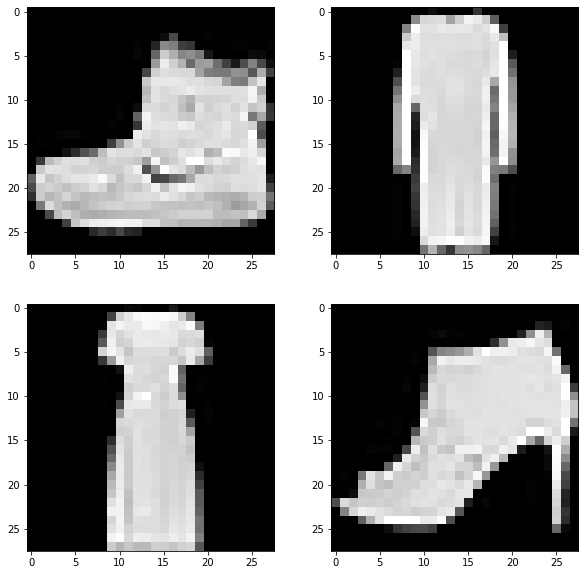

In [14]:
i = 0
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(train_x[i], cmap='gray')
plt.subplot(222), plt.imshow(train_x[i+25], cmap='gray')
plt.subplot(223), plt.imshow(train_x[i+50], cmap='gray')
plt.subplot(224), plt.imshow(train_x[i+75], cmap='gray')

In [15]:
y=train['label'].values
y = to_categorical(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [20]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
3/3 [==============================] - 1s 306ms/step - loss: 2.3209 - accuracy: 0.1442 - val_loss: 2.0866 - val_accuracy: 0.6000
Epoch 2/20
3/3 [==============================] - 0s 96ms/step - loss: 2.0362 - accuracy: 0.3352 - val_loss: 1.8267 - val_accuracy: 0.4000
Epoch 3/20
3/3 [==============================] - 0s 95ms/step - loss: 1.7115 - accuracy: 0.4644 - val_loss: 1.3462 - val_accuracy: 0.8000
Epoch 4/20
3/3 [==============================] - 0s 93ms/step - loss: 1.5274 - accuracy: 0.3807 - val_loss: 0.8768 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 95ms/step - loss: 1.1832 - accuracy: 0.5551 - val_loss: 0.7380 - val_accuracy: 0.9000
Epoch 6/20
3/3 [==============================] - 0s 94ms/step - loss: 1.1974 - accuracy: 0.5228 - val_loss: 0.7224 - val_accuracy: 0.8000
Epoch 7/20
3/3 [==============================] - 0s 94ms/step - loss: 0.9207 - accuracy: 0.6855 - val_loss: 0.6898 - val_accuracy: 0.8000
Epoch 8/20
3/3 [==========

In [21]:
download = drive.CreateFile({'id': '1dt44eJFLwAy7B_miMt8__fCSrLVHMXw-'})
download.GetContentFile('Test.zip')
!unzip Test.zip

Archive:  Test.zip
replace Test/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Test/test.csv           
 extracting: Test/test/1.png         
 extracting: Test/test/10.png        
 extracting: Test/test/11.png        
 extracting: Test/test/12.png        
 extracting: Test/test/13.png        
 extracting: Test/test/14.png        
 extracting: Test/test/15.png        
 extracting: Test/test/16.png        
 extracting: Test/test/17.png        
 extracting: Test/test/18.png        
 extracting: Test/test/19.png        
 extracting: Test/test/2.png         
 extracting: Test/test/20.png        
 extracting: Test/test/21.png        
 extracting: Test/test/22.png        
 extracting: Test/test/23.png        
 extracting: Test/test/24.png        
 extracting: Test/test/25.png        
 extracting: Test/test/26.png        
 extracting: Test/test/27.png        
 extracting: Test/test/28.png        
 extracting: Test/test/29.png        
 extracting: Test/test/3.png         
 extra

In [22]:
test = pd.read_csv('Test/test.csv')

In [23]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('Test/test/'+test['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

  0%|          | 0/51 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 51/51 [00:00<00:00, 2394.36it/s]


In [24]:
prediction = np.argmax(model.predict(test), axis=-1)
prediction

array([3, 8, 5, 1, 3, 4, 0, 7, 5, 7, 9, 8, 6, 1, 0, 2, 2, 3, 4, 3, 4, 0,
       6, 5, 8, 6, 6, 1, 8, 2, 9, 0, 3, 1, 7, 5, 6, 6, 7, 0, 3, 4, 4, 1,
       7, 5, 1, 0, 5, 9, 0])

In [25]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
X_train.shape

(90, 28, 28, 1)

In [27]:
X_train = X_train.reshape(90,28*28*1)
X_test = X_test.reshape(10,28*28*1)

In [28]:
y_train = np.argmax(y_train, axis=1)

In [29]:
y_test = np.argmax(y_test, axis=1)

In [30]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
pred=nb.predict(X_test)

In [32]:
pred

array([7, 6, 1, 2, 9, 4, 4, 1, 0, 9])

In [33]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           4       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           9       1.00      0.67      0.80         3

    accuracy                           0.70        10
   macro avg       0.64      0.60      0.59        10
weighted avg       0.85      0.70      0.74        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [34]:
download = drive.CreateFile({'id': '1cltVVBHIs368dFvtM1oGw4QvYjNaU90M'})
download.GetContentFile('Final.csv')

In [35]:
Final=pd.read_csv('Final.csv')
Final['label'] = prediction
Final.to_csv('Final.csv', header=True, index=False)